In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score, PredictionErrorDisplay
from sklearn.model_selection import train_test_split

from src.auxiliares import dataframe_coeficientes
from src.config import DADOS_TRATADOS
from src.graficos import plot_coeficientes, plot_residuos

sns.set_theme(palette="bright")

RANDOM_STATE = 42

In [3]:
df = pd.read_parquet(DADOS_TRATADOS)

df.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose,target
0,59,2,32.099998,101.0,157,93.199997,38.0,4.0,4.8598,87,151
1,48,1,21.600000,87.0,183,103.199997,70.0,3.0,3.8918,69,75
2,72,2,30.500000,93.0,156,93.599998,41.0,4.0,4.6728,85,141
3,24,1,25.299999,84.0,198,131.399994,40.0,5.0,4.8903,89,206
4,50,1,23.000000,101.0,192,125.400002,52.0,4.0,4.2905,80,135


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             442 non-null    int8   
 1   sexo              442 non-null    int8   
 2   imc               442 non-null    float32
 3   pressao_media     442 non-null    float32
 4   colesterol_total  442 non-null    int16  
 5   ldl               442 non-null    float32
 6   hdl               442 non-null    float32
 7   colesterol_hdl    442 non-null    float32
 8   triglicerides     442 non-null    float32
 9   glicose           442 non-null    int8   
 10  target            442 non-null    int16  
dtypes: float32(6), int16(2), int8(3)
memory usage: 13.5 KB


Quando desenvolvemos um modelo de machine learning, nosso objetivo principal é criar um sistema que seja capaz de fazer previsões precisas em dados que o modelo nunca viu antes. Para alcançar esse objetivo, precisamos garantir que o modelo não apenas aprenda os padrões dos dados de treinamento, mas que também seja capaz de generalizar esse aprendizado para novos dados.

#### **Base de Treinamento (Training Set)**

A base de treinamento é a parte dos dados que o modelo utiliza para aprender. Nessa etapa, o modelo ajusta seus parâmetros internos, como os coeficientes de uma regressão linear ou os pesos de uma forma geral, para minimizar o erro em relação aos dados de treinamento.

- **Objetivo**: Permitir que o modelo aprenda as relações e padrões presentes nos dados. Durante o treinamento, o modelo é exposto a esses dados repetidamente para refinar sua capacidade de fazer previsões.

- **Risco**: Se o modelo tiver muita capacidade (por exemplo, se for muito complexo), ele pode "memorizar" os dados de treinamento, resultando em overfitting. Overfitting ocorre quando o modelo se ajusta tão bem aos dados de treinamento que perde a capacidade de generalizar para novos dados.

#### **Base de Teste (Test Set)**

A base de teste, por outro lado, é um conjunto de dados separado que o modelo não vê durante o treinamento. Esse conjunto é reservado exclusivamente para avaliar o desempenho do modelo após ele ter sido treinado.

- **Objetivo**: Fornecer uma estimativa imparcial do desempenho do modelo em dados novos, simulando como ele se comportaria em um ambiente real. Como o modelo não teve acesso a esses dados durante o treinamento, seu desempenho na base de teste é um bom indicador de sua capacidade de generalização.

- **Risco**: Se a base de teste for usada de forma inadequada, por exemplo, se for utilizada para ajustar hiperparâmetros ou refinar o modelo, ela pode deixar de ser um teste imparcial, levando a uma avaliação excessivamente otimista do desempenho do modelo.

### Importância da Separação

1. **Avaliação da Generalização**:
   - A principal razão para separar os dados em treino e teste é avaliar a capacidade do modelo de generalizar para novos dados. Sem essa separação, não teríamos como medir o quanto o modelo aprendeu de forma robusta ou se ele está simplesmente memorizando os dados de treinamento.

2. **Detecção de Overfitting e Underfitting**:
   - Ao comparar o desempenho do modelo nos dados de treinamento e teste, podemos identificar problemas de overfitting (quando o desempenho no treino é muito melhor do que no teste) e underfitting (quando o desempenho é ruim em ambos).

3. **Validação Imparcial**:
   - Usar um conjunto de dados separado para teste garante que a avaliação do modelo seja imparcial e reflita seu verdadeiro desempenho em situações do mundo real.

### Procedimentos Relacionados

- **Cross-Validation**: Para mitigar o risco de que a divisão específica dos dados em treino e teste possa influenciar os resultados, muitas vezes utilizamos a técnica de validação cruzada (cross-validation). Nessa técnica, o conjunto de dados é dividido em várias partes, e o treinamento e teste são realizados múltiplas vezes, cada vez com uma parte diferente dos dados reservada para teste. Isso fornece uma estimativa mais robusta do desempenho do modelo.



https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [6]:
X_train.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose
17,68,2,27.500000,111.0,214,147.000000,39.0,5.0,4.9416,91
66,46,2,24.700001,85.0,174,123.199997,30.0,6.0,4.6444,96
137,50,1,31.000000,123.0,178,105.000000,48.0,4.0,4.8283,88
245,41,1,23.100000,86.0,148,78.000000,58.0,3.0,4.0943,60
31,42,1,20.299999,71.0,161,81.199997,66.0,2.0,4.2341,81


In [7]:
X_train.shape

(353, 10)

In [8]:
X_test.head()

,idade,sexo,imc,pressao_media,colesterol_total,ldl,hdl,colesterol_hdl,triglicerides,glicose
287,61,1,25.799999,90.000000,280,195.399994,55.0,5.0,4.9972,90
211,74,1,29.799999,101.000000,171,104.800003,50.0,3.0,4.3944,86
72,66,2,26.000000,91.000000,264,146.600006,65.0,4.0,5.5683,87
321,75,1,31.200001,117.669998,229,138.800003,29.0,7.9,5.7236,106
73,52,2,24.500000,94.000000,217,149.399994,48.0,5.0,4.5850,89


In [9]:
X_test.shape

(89, 10)

In [10]:
y_train.head()

17     144
66     150
137    280
245    125
31      59
Name: target, dtype: int16

In [11]:
y_test.head()

287    219
211     70
72     202
321    230
73     111
Name: target, dtype: int16

In [12]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
regressor.score(X_train, y_train)

0.5279194116592407

In [14]:
regressor.score(X_test, y_test)

0.4526023268699646

In [15]:
regressor.coef_

array([  0.1376898 , -23.064426  ,   5.846359  ,   1.197093  ,
        -1.2816849 ,   0.81114864,   0.6016509 ,  10.159533  ,
        67.1089    ,   0.20159864], dtype=float32)

In [16]:
regressor.intercept_

np.float32(-341.37747)

In [17]:
coefs = dataframe_coeficientes(regressor.coef_, X.columns)

coefs

,coeficiente
sexo,-23.064426
colesterol_total,-1.281685
idade,0.137690
glicose,0.201599
hdl,0.601651
ldl,0.811149
pressao_media,1.197093
imc,5.846359
colesterol_hdl,10.159533
triglicerides,67.108902


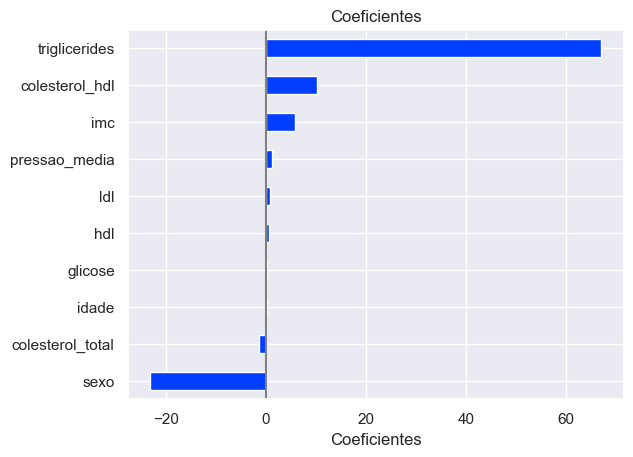

In [18]:
plot_coeficientes(coefs)

Os coeficientes de uma regressão linear muitas vezes são interpretados como indicadores da importância das features, mas essa interpretação precisa ser feita com cautela.

### 1. **Coeficientes e Importância Relativa**
   
Em uma regressão linear, o coeficiente associado a cada feature indica a mudança esperada na variável dependente (target) para cada unidade de mudança na feature, mantendo todas as outras features constantes. Em termos simples, um coeficiente maior sugere que a feature correspondente tem um impacto maior na predição do modelo.

No entanto, essa interpretação pode ser enganosa, especialmente em modelos com múltiplas features. A magnitude dos coeficientes pode ser afetada por vários fatores, que não necessariamente refletem a verdadeira importância das features:

- **Escala das Features**: Se as features estão em escalas diferentes, os coeficientes podem ser desproporcionalmente influenciados por essa diferença. Por exemplo, uma feature que varia entre 0 e 1 pode ter um coeficiente pequeno, enquanto uma feature que varia entre 1 e 1000 pode ter um coeficiente grande, mesmo que ambas tenham uma importância semelhante. A padronização ou normalização das features antes de aplicar a regressão linear pode ajudar a mitigar esse problema.

- **Colinearidade**: Quando há colinearidade (ou multicolinearidade) entre as features, os coeficientes podem se tornar instáveis e difíceis de interpretar. A presença de colinearidade significa que as features estão correlacionadas entre si, o que pode levar a coeficientes inflacionados ou com sinais contrários ao esperado. Nesse caso, os coeficientes podem não refletir a verdadeira relação entre as features e o target.

**Colinearidade e Multicolinearidade em Machine Learning**

**Colinearidade:**  
Colinearidade ocorre quando duas variáveis independentes (ou preditoras) em um modelo de regressão estão altamente correlacionadas, ou seja, elas têm uma relação linear entre si. Isso significa que uma das variáveis pode ser quase completamente explicada pela outra. No contexto de machine learning, a colinearidade pode levar a problemas na estimativa dos coeficientes de regressão, tornando-os menos confiáveis e mais sensíveis a pequenas mudanças nos dados.

**Multicolinearidade:**  
Multicolinearidade é uma extensão do conceito de colinearidade e ocorre quando uma variável independente é altamente correlacionada com uma combinação linear de outras variáveis independentes no modelo. Em outras palavras, várias variáveis independentes estão correlacionadas entre si, o que pode dificultar a separação do efeito individual de cada uma sobre a variável dependente.

**Impactos em Machine Learning:**  
- **Instabilidade nos Coeficientes:** Em modelos de regressão linear, a multicolinearidade pode causar instabilidade nos coeficientes estimados, resultando em grandes variações entre diferentes amostras de dados.
- **Redução da Interpretabilidade:** Quando as variáveis preditoras estão correlacionadas, torna-se difícil determinar a importância individual de cada variável no modelo.
- **Aumento do Overfitting:** A multicolinearidade pode aumentar o risco de overfitting, onde o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados.

**Soluções:**  
- **Remoção de Variáveis Correlacionadas:** Identificar e remover uma ou mais variáveis preditoras altamente correlacionadas pode ajudar a reduzir a multicolinearidade.
- **Regularização (Ridge e Lasso):** Como mencionado anteriormente, técnicas de regularização, como Ridge e Lasso, podem ajudar a mitigar os efeitos da multicolinearidade, penalizando coeficientes grandes e ajudando a estabilizar as estimativas.


### 2. **Interpretação de Coeficientes em Regimes Diferentes**

- **Regressão Linear Simples**: Em uma regressão linear simples (uma única feature), o coeficiente pode ser interpretado diretamente como a importância da feature na predição do target.

- **Regressão Linear Múltipla**: Em uma regressão linear múltipla (várias features), a interpretação dos coeficientes se torna mais complexa. Cada coeficiente representa a influência de uma feature considerando que todas as outras features estão presentes no modelo. A interação entre as features pode distorcer a percepção da importância de cada uma.

### 3. **Outras Medidas de Importância**

Dada a complexidade envolvida na interpretação dos coeficientes, outras técnicas e métricas são frequentemente utilizadas para avaliar a importância das features:

- **Importância baseada em árvores**: Modelos baseados em árvores de decisão, como Random Forests, calculam a importância das features com base na redução do erro de predição ao longo de todas as árvores. Essa métrica pode ser mais robusta e intuitiva em cenários onde as features interagem de maneira complexa.

- **Coeficientes Regularizados**: Modelos de regressão linear com regularização, como Lasso (L1) e Ridge (L2), ajustam os coeficientes para reduzir overfitting e podem fornecer uma ideia mais confiável da importância das features. O Lasso, por exemplo, pode zerar os coeficientes de features menos importantes, promovendo um modelo mais interpretável.

### 4. **Cenários Específicos**

- **Dados com Alta Dimensionalidade**: Em conjuntos de dados com muitas features, os coeficientes podem ser difíceis de interpretar, especialmente se o modelo estiver sobreajustado (overfitting). Regularização e seleção de features são fundamentais nesses casos.

- **Modelos Lineares vs. Modelos Não Lineares**: Em modelos não lineares (como redes neurais ou máquinas de vetores de suporte com kernels não lineares), a ideia de "importância de feature" baseada em coeficientes não se aplica da mesma forma. Nesses casos, técnicas específicas de interpretação são necessárias.


In [19]:
y_pred = regressor.predict(X_test)

y_pred

array([139.54721 , 179.5173  , 134.0386  , 291.4169  , 123.78958 ,
        92.17215 , 258.2322  , 181.33707 ,  90.22418 , 108.63364 ,
        94.13852 , 168.43503 ,  53.504913, 206.63083 , 100.129364,
       130.66672 , 219.53061 , 250.78024 , 196.36911 , 218.5751  ,
       207.35043 ,  88.48331 ,  70.43286 , 188.95914 , 154.88678 ,
       159.36179 , 188.31271 , 180.39108 ,  47.99054 , 108.97446 ,
       174.77884 ,  86.36398 , 132.95761 , 184.53824 , 173.83206 ,
       190.35837 , 124.41568 , 119.65103 , 147.95163 ,  59.054077,
        71.62332 , 107.68298 , 165.45386 , 155.0098  , 171.048   ,
        61.45758 ,  71.66675 , 114.96747 ,  51.579865, 167.57596 ,
       152.52307 ,  62.95569 , 103.49744 , 109.20752 , 175.64096 ,
       154.60297 ,  94.4169  , 210.74216 , 120.25659 ,  77.61597 ,
       187.93173 , 206.49338 , 140.63177 , 105.59677 , 130.70428 ,
       202.18515 , 171.13022 , 164.9143  , 124.72479 , 144.8103  ,
       181.99637 , 199.4136  , 234.21426 , 145.95673 ,  79.867

In [20]:
r2_score(y_test, y_pred)

0.4526023268699646

In [21]:
mean_absolute_error(y_test, y_pred)

np.float32(42.794098)

In [22]:
mean_squared_error(y_test, y_pred)

np.float32(2900.196)

In [24]:
root_mean_squared_error(y_test, y_pred)

np.float32(53.85347)

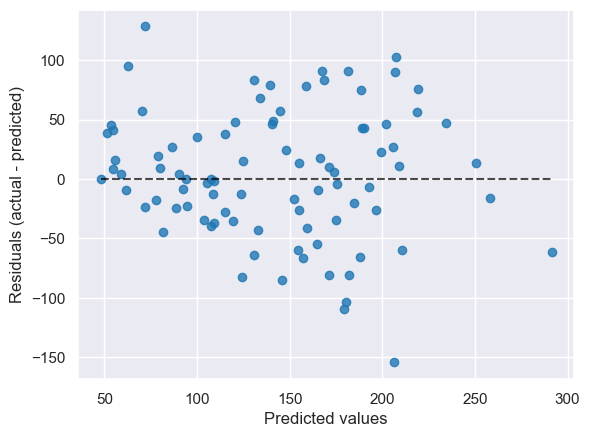

In [29]:
PredictionErrorDisplay.from_predictions(
    y_true=y_test, 
    y_pred=y_pred
)

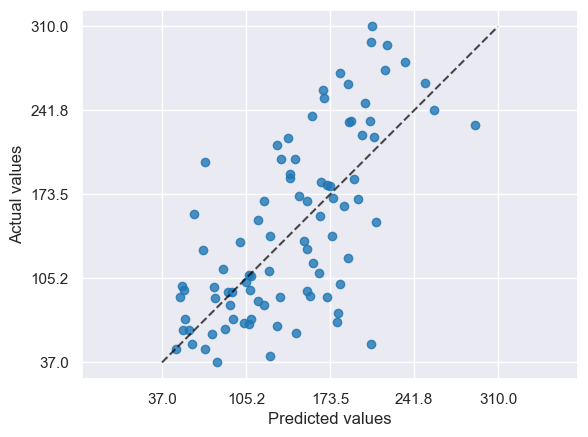

In [28]:
PredictionErrorDisplay.from_predictions(
    y_true=y_test, 
    y_pred=y_pred,
    kind="actual_vs_predicted"
)

<Axes: xlabel='target', ylabel='Count'>

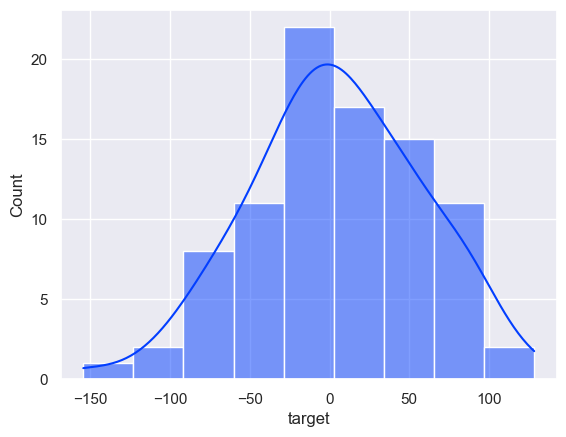

In [32]:
residuos = y_test - y_pred

sns.histplot(residuos, kde=True)

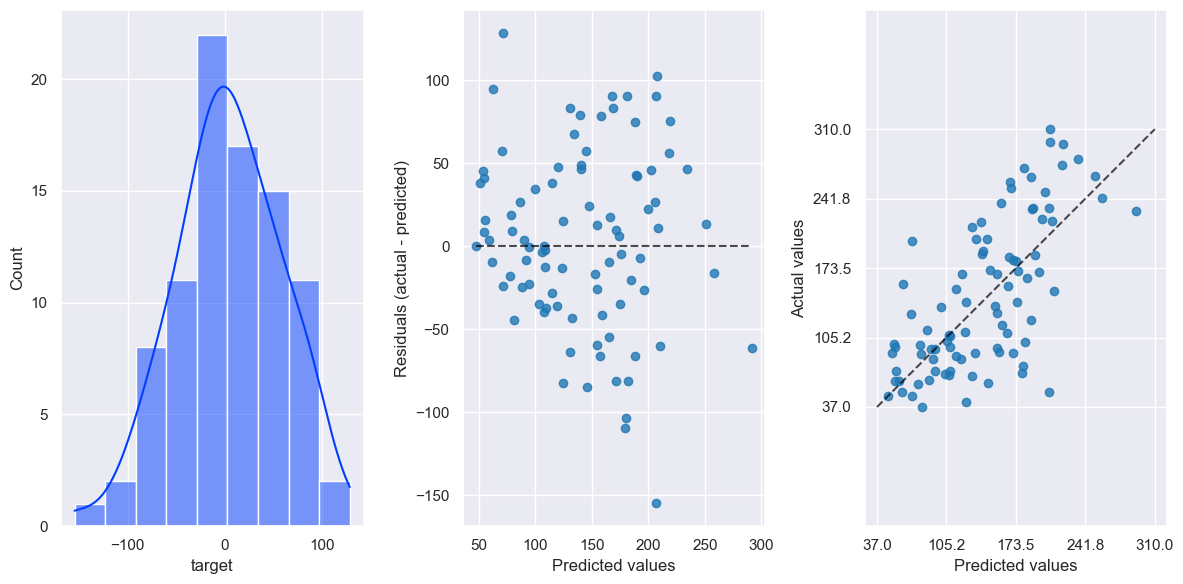

In [36]:
plot_residuos(y_test, y_pred)